<font face="微軟正黑體">
# 紫外線即時監測資料分析與視覺化 
作者: 郭芷辰
* * *

## 緒論
* * *
###  <font color=#FF7F50 >背景與動機</font>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;西元 1958 年，英國科學家 Joseph Farman等人發現南極春季時大氣臭氧量<b>約減少 40 %</b> ，而其他研究團隊也快速證實這項驚人發現，並指出臭氧量急遽減少的區域面積甚至大於南極大陸。這個南極平流層上方臭氧急劇減少的區塊，即為「<font color=#FA8072>臭氧洞(Ozone hole)</font>」。臭氣洞表示臭氧含量反常稀少的區域。南極臭氧層厚度變化極大，從 100 至 400 Dobson Unit，而厚度若在 220 Dobson Unit 以下，即稱為臭氧層破洞。南極臭氧洞的發現（如下圖1.1）使人們開始正視環保議題。
此發現也意味著臭氧濃度的降低，而臭氧濃度的降低會導致近地面紫外線的增加，其引發的皮膚疾病及相關問題也讓民眾更加注意紫外線資訊。

<img src="https://ncse.com/files/blog-images/ozone_hole_NASA.jpg" width=256 height=256 />
<center>圖1.1 臭氧洞視覺化 資料來源: NASA</center>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;同時，近日全台夏日炎炎，暑氣正旺，雖天氣晴朗但十分悶熱，搭配沁涼飲料解渴觀看新聞台所播送之時事與天氣預報時，常常有紫外線過量相關的新聞標題，或是提醒民眾補充水分注意熱傷害等溫馨警語充斥版面，因此，紫外線指數也成為國人出門是否需加強防曬的依據之一。
<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;日前，許多地區紫外線指數被列為「危險級」，也有許多類似「去南部不抹防曬會變很黑」等字句在我的生活圈中流傳，令長期居住在南部讀書的我非常惶恐，但若觀看溫度資訊，發現南北一致酷熱，甚至台北溫度偶會高於南部，因此不禁讓人興起好奇心: 究竟南部是否較北部容易曬黑? 
<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;而我們知道曬黑或曬傷的主要原因是陽光中的紫外線。如果我們的皮膚曝露了過量的紫外線，會造成皮下的微血管擴張，把較多的血液帶到皮膚表面來，皮膚因而發紅、變熱。長期曝露於紫外光下，會使皮膚變黑，因為紫外光會使正常情況下沒有顏色的色素氧化，接著再活化（或是間接的把一個抑制劑去活化）酪氨酸鋂(tyrosinase) 。這種鋂的活化會使皮膚裡的黑色素(melanin)增加。黑色素是一種黑色或棕色的色素分子，其可以保護皮膚細胞的細胞核，在細胞外形成一層過濾紫外線的保護層，皮膚便因此變黑。
<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;由上述，皮膚變黑與紫外線息息相關，<b>本分析想針對全台各地紫外線指數與其所在緯度進行分析並視覺化，包含想透過資料分析來了解台灣各地的紫外線指數是否隨著緯度的增加，紫外線指數指數隨之降低等。以及嘗試將各地UVI數值搭配台灣地圖將之圖形化，以達到一目瞭然各地UVI差異之目標，並期望夠過各地UVI不同時間的數值變化，找出緯度與UVI指數的相關程度等</b>。


## 資料蒐集、資料範例與前處理

* * *
 ### <font color=#FF7F50 >資料選擇</font> 
 開放API : [政府資料開放平台](https://data.gov.tw/) 
- [每日紫外線指數最大值](https://data.gov.tw/dataset/9039)：使用爬蟲方式與re模組得到全台UVI最大值
- [紫外線即時監測資料](https://data.gov.tw/dataset/6076)：取得及每小時即時監測資料，紫外線指數發布機關自 中央氣象局 與 環境保護署 ，而此網址已合併兩方資料，因此選擇此資源除了有一定的準確度與可信度，也有提供各地的經緯度資訊與發佈時間等可提供分析，並有超過 30 多處的觀測資料，包含台灣本島與外島地區，十分完整。需特別注意的是經緯度欄位採用 WGS 。然缺點為及時資料，因此需先對所需資料爬蟲後存檔，待分析時再行讀檔動作，以下為主要欄位列表：
    
| 主要欄位 | 縣市 | 發布機關 | 發布時間 | 測站名稱 | 紫外線指數 |  緯度(WGS84)|  經度(WGS84)
| :--- |:---|:---|:---|:---|
|Main Field|County|Publish Agency|Publish Time|SiteName|UVI|WGS84Lat|WGS84Lon

### <font color=#FF7F50 >名詞解釋</font> 
- UVI：從1997年7月開始，中央氣象局提供一項紫外線指數的報導。所謂紫外線指數即測報紫外線到達地面時單位面積的輻射量之數值（其單位為百焦耳／平方公尺），例如：若到達地面的輻射量為六百焦耳／平方公尺，則轉換為紫外線指數為 6 。紫外線指數的大小和太陽角度、臭氧總量、雲、懸浮微粒、地表反照率與高度有密切關係。為使一般大眾更方便使用這個指數，將指數分為:  

| 強度 | 低量級 | 中量級 | 高量級 | 過量級 | 危險級 |
| ---: |---:|---:|---:|---:|
| 指數 | 0-2 | 3-5 | 6-7 | 8-10 | 11+ |

- WGS：世界大地測量系統（World Geodetic System, WGS）是一種用於地圖學、大地測量學和導航（包括全球定位系統）的大地測量系統標準，目前最新版本為WGS 84。WGS84坐標系統為協議地球座標系統(CTS)的一種表現，該系統之原點假設為地球質量中心，其Z軸指向國際時間局(BIH)定義的地球北極，X軸為地球質量中心指向國際時間局(BIH)定義之零子午圈與赤道的交點、Y軸和X、Z軸構成右手系統座標系統。


###  <font color=#FF7F50 >資料範例</font> 
說明：除原資料欄位外，新增英文觀測地點一欄。在此以<font color=#FA8072> 2018 / 08 / 01 ，發布時間 11 : 00 </font>為例。 

In [99]:
# -*- coding: utf-8 -*-
%matplotlib inline
from requests_html import HTMLSession
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

with open( '0801_11.json', 'r' , encoding='utf-8-sig' ) as f2:
    list_0801_11 = json.load(f2)
    
County = []
PublishAgency = []
PublishTime = []
Latitude = []
Longitude = []
Sitelist_ch = []
Sitelist = []
Uvi = [] #2018/08/01 11:00

d = {'淡水': 'Tamsui', '板橋': 'Banqiao', '桃園': 'Taoyuan', '苗栗': 'Miaoli', '沙鹿': 'Shalu', 
     '彰化': 'Changhua', '南投': 'Nantou', '斗六': 'Douliu','塔塔加': 'Tatajia', '朴子': 'Puzi', 
     '新營': 'Xinying', '橋頭': 'Qiaotou', '屏東': 'Pingtung', '嘉義': 'Chiayi', '臺中': 'Taizhong', 
     '澎湖': 'Penghu', '宜蘭': 'Yilan', '金門': 'Kinmen', '日月潭': 'Sun Moon Lake', '臺東': 'Taitung',
     '蘭嶼': 'Lanyu', '新屋': 'Xinwu', '基隆': 'Keelung', '成功': 'Chenggung', '臺北': 'Taipei', 
     '恆春': 'Hengchun', '鞍部': 'Anbu', '新竹': 'Hsinchu', '臺南': 'Tainan', '玉山': 'Mt. Jade',
     '高雄': 'Kaohsiung', '馬祖': 'Matsu', '花蓮': 'Hualien'}

for content in list_0801_11 :
    if (content['UVI']==''or float(content['UVI'])<0):
        pass
    else:
        #Sitename[content['SiteName']]+= float(content['UVI'])
        County.append(content['County'])
        PublishAgency.append(content['PublishAgency'])
        PublishTime.append(content['PublishTime'])
        Sitelist_ch.append(content['SiteName'])
        Sitelist.append(d [content['SiteName']] )
        Uvi.append(content['UVI'])
        Latitude.append(content['WGS84Lat'])
        Longitude.append(content['WGS84Lon'])
        

df=pd.DataFrame({'Country' : County,
                 'Publish Agency' : PublishAgency,
                 'Publish Time' : PublishTime,
                 'Site Name (Zh-TW)': Sitelist_ch,
                 'Site Name (EN)' : Sitelist,
                 'UVI' : Uvi,
                 'Latitude' : Latitude,
                 'Longitude' : Longitude})
df.head()

,Country,Publish Agency,Publish Time,Site Name (Zh-TW),Site Name (EN),UVI,Latitude,Longitude
0,新北市,環境保護署,2018-08-01 11:00,淡水,Tamsui,8,"25,09,52.20","121,26,57.26"
1,新北市,環境保護署,2018-08-01 11:00,板橋,Banqiao,8,"25,00,46.7","121,27,31.2"
2,桃園市,環境保護署,2018-08-01 11:00,桃園,Taoyuan,8,"24,59,12.40","121,18,31.40"
3,苗栗縣,環境保護署,2018-08-01 11:00,苗栗,Miaoli,9,"24,33,54.97","120,49,12.72"
4,臺中市,環境保護署,2018-08-01 11:00,沙鹿,Shalu,9,"24,13,32.26","120,34,7.66"


### <font color=#FF7F50 >視覺化前處理說明</font> 

在以下實作數據分析時，需要特別將以下原始資料做轉換或預先準備:
    
    - WGS84 : 我們日常生活中熟習的經緯度表示法以及模組所需的經度、緯度表示法皆為十進位表示法。在後續視覺化繪圖時，需將原始資料的度分秒表示法轉換為十進位表示法方可進行實作，在後續繪圖時會進行更詳細的說明。
    
    - 查詢中文地名之英文(在上面的 資料範例 程式碼中使用 dict 進行中英文對照)，後續視覺化繪圖時將採全部用英文地名。
    
    - 爬蟲下載所需分析資料 : 本分析視覺化資料將採用 2018/08/01 的資料作分析，其中資料範例、敘述性統計、地理繪圖的呈現以當日(08/01) 11:00 為主，其餘數值分析則會引入同日(08/01) 09:00、13:00、15:00 的資料，因此需先將所需資料爬蟲下載json檔進本地。由於此資源為即時資料，所以在 08/01 當日須分別在此四時段共進行四次爬蟲，以下為程式碼。


In [100]:
url = 'http://opendata2.epa.gov.tw/UV/UV.json'
r = requests.get(url)
reqsjson = json.loads(r.text)

'''
f = open('0801_09.json','w+')
data_list  = r.json()  
data_string = json.dumps(data_list)  
f.write(data_string) 
f.close()
'''

with open( '0801_09.json', 'r' , encoding='utf-8-sig' ) as f1:
    list_0801_09 = json.load(f1)
with open( '0801_13.json', 'r' , encoding='utf-8-sig' ) as f3:
    list_0801_13 = json.load(f3)
with open( '0801_15.json', 'r' , encoding='utf-8-sig' ) as f4:
    list_0801_15 = json.load(f4)

Uvi_9 = [] #2018/08/01 9:00
Uvi_13 = [] #2018/08/01 13:00
Uvi_15 = [] #2018/08/01 15:00
for content in list_0801_09 :
    if (content['UVI']==''or float(content['UVI'])<0):
        pass
    else:
        Uvi_9.append(content['UVI'])
uvi_str_to_float_9 = list(map(lambda x:float(x), Uvi_9))

for content in list_0801_13 :
    if (content['UVI']==''or float(content['UVI'])<0):
        pass
    else:
        Uvi_13.append(content['UVI'])
uvi_str_to_float_13 = list(map(lambda x:float(x), Uvi_13))

for content in list_0801_15 :
    if (content['UVI']==''or float(content['UVI'])<0):
        pass
    else:
        Uvi_15.append(content['UVI'])
uvi_str_to_float_15 = list(map(lambda x:float(x), Uvi_15))

## 資料呈現與視覺化
* * *
###  <font color=#FF7F50> 取得每日UVI最大值 </font> 
利用 urllib.request 模組讀 csv 檔並用 re 模組的正規表示式得到所求，此數值在後續分析與資料呈現將會使用。

In [101]:
import urllib.request
import re
url_2 = 'http://opendata.cwb.gov.tw/govdownload?dataid=O-A0005-001&authorizationkey=rdec-key-123-45678-011121314'
r = urllib.request.urlopen(url_2)
bytes_data = r.read()

text = bytes_data.decode(encoding='utf-8')
pattern = r'<value>(.*?)</value>'
match_str = re.findall(pattern,text)

match_str_to_float = list(map(lambda x:float(x), match_str))
max_uvi = max(match_str_to_float)
print("Max Uvi today is",max_uvi,".")

Max Uvi today is 14.27 .


###  <font color=#FF7F50 >每個觀測站之UVI</font> 
- 利用長條圖 (bar chart) 呈現 UVI 值，並用兩條線做輔助:
    1. 全台各觀測站平均UVI線 : 用來表示各地 UVI 相對於平均 UVI 之高低，可見 Anbu (鞍部) 較其他低區低，而 Mt. Jade (玉山) 較其他地區高。
    2. 當日最高UVI線 : 單純用來比較距離最高 UVI 的差距。由於爬蟲的時間不為當日 11:00，因此數值與當日 11:00 玉山出現的最高數值13.26有所出入。


- x 軸為英文觀測站名，y 軸為 UVI，由於夏天最高的紫外線指數逼近 15，因此 y 軸的範圍最高採用16，最低為0 (不為負值)

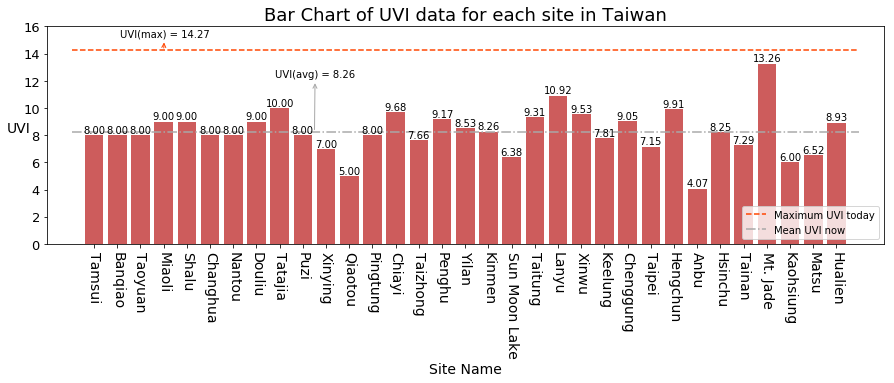

In [102]:
import statistics as s

#draw bar chart
plt.figure(figsize=(15,4))
uvi_str_to_float = list(map(lambda x:float(x), Uvi))
plt.bar( Sitelist , uvi_str_to_float ,color='IndianRed' )

plt.xticks(fontsize=14, rotation=270)
plt.yticks( range(0, 18, 2),fontsize=13)

plt.xlabel('Site Name', fontsize=14)
plt.ylabel('UVI', fontsize=14, rotation=0)

#line of max uvi
plt.axhline(y = max_uvi, xmin=0.03, xmax=0.97, color='OrangeRed', linestyle='dashed')
plt.annotate ("UVI(max) = "+str(max_uvi), (3,  max_uvi), (1.1,  max_uvi+1), 
              arrowprops=dict(arrowstyle='<-', color='OrangeRed'))

#line of mean uvi
mean_uvi = np.mean(uvi_str_to_float)
plt.axhline(y = mean_uvi, xmin=0.03, xmax=0.97, color='DarkGray', linestyle='dashdot')
#set a arrow 
plt.annotate ("UVI(avg) = "+str('%.2f'%mean_uvi), (9.5, mean_uvi), (7.8, max_uvi-2), 
              arrowprops=dict(arrowstyle='<-', color='DarkGray'))

plt.legend(('Maximum UVI today', 'Mean UVI now'), loc='lower right')

plt.title('Bar Chart of UVI data for each site in Taiwan', fontsize=18)

for x,y in zip( Sitelist , uvi_str_to_float ):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text( x , y ,'%.2f'%y , ha='center', va='bottom' )

###  <font color=#FF7F50 > UVI之箱型圖 </font> 
平均數不等於中位數代表全台 UVI 非常態分配，這裡平均數(綠色三角形)較中位數(紅色線)大，代表有大的極端值，不難發現此極端值出現在 Mt. Jade (玉山)，與上長條圖結論一致。

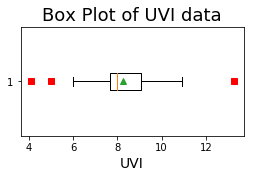

In [103]:
plt.figure(figsize=(4,2))
plt.boxplot(uvi_str_to_float,sym='rs',vert=False,meanline=False,showmeans=True)
plt.xlabel('UVI', fontsize=14)
plt.title('Box Plot of UVI data', fontsize=18)
plt.show()

###  <font color=#FF7F50 > 各地 UVI 之地理分布圖 </font> 
首先須繪製台灣地圖，引入Basemap模組創立物件、屬性後再引入外部資訊，最後顯示地圖，詳細說明如下；
1. 先設計一個basemap物件m，用來表示地圖物件。
    - projection='merc' 表 麥卡托投影
    - resolution='h' 表 高解析度
    - llcrnrlat, llcrnrlon 分別為經、緯度的最低值，這裡設定為東經 118 度(才可包含金門)，北緯 21.8 度 (才可包含恆春)
    - urcrnrlat, urcrnrlon 分別為經、緯度的最高值，這裡設定為東經 122.07 度(才可包含宜蘭)，北緯 21.8 度 (才可包含馬祖)<br>
<br>
2. 設置地圖的屬性 : 
    - drawcoastlines : 海岸線的寬度
    - drawmapboundary 與 fillcontinents 可為陸地與海面著色<br>
<br>    
3. 換算各地十分位經緯度表示法 : 度 + 分/60 + 秒/3600
    - 以 淡水 度分秒經緯度 (25, 09, 52.20)為例，25為度，09為分，52.20為秒，因此淡水的緯度為25 + 9/60 + 25.02/3600 ，以此類推
    - 程式碼以 site_long 這個list儲存各地經度，site_lat_list 這個list儲存各地緯度<br>
<br>    
4. 散佈圖
    - 以 (uvi/max_uvi) 乘以 5000 代表各點的面積大小，透過與最大UVI的比值表示UVI大小的程度
    - 設 zorder = 10 可將散佈圖蓋於原地圖之上<br>


由地圖可見，多數觀測站集中在沿海地區，尤其是西部沿海，高山的觀測站略少，圖中整個中央山脈地區只有兩個觀測站 : 玉山與塔塔加，而外島各地幾乎有設立觀測站，推測也許與觀測站數量與人口數呈現正比關係。

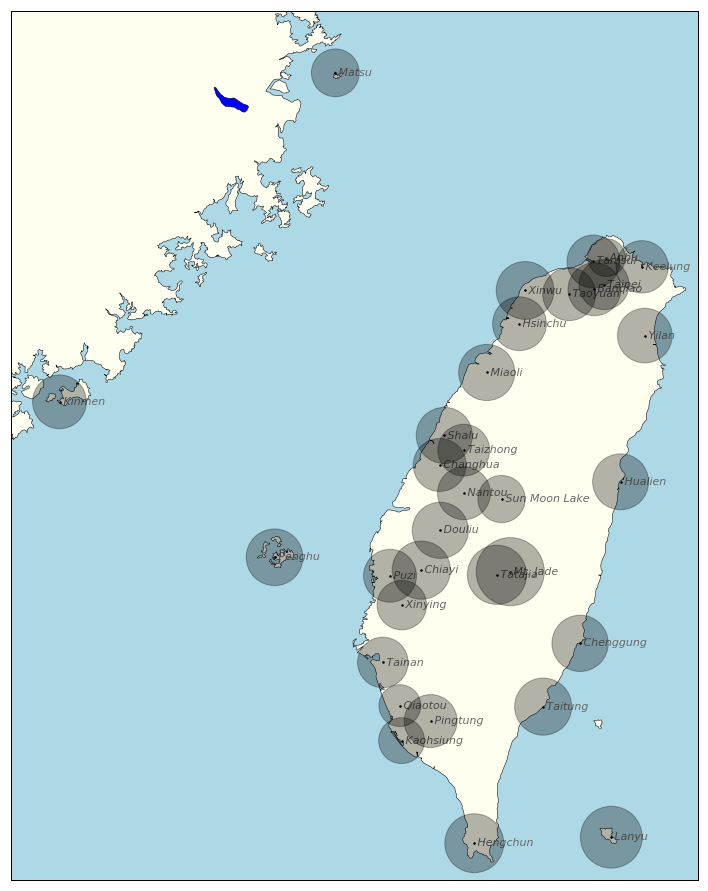

In [109]:
from mpl_toolkits.basemap import Basemap
import shapefile
import pylab
pylab.rcParams['figure.figsize'] = (30.0, 16.0) 

m = Basemap()
m = Basemap(projection='merc', resolution='h',llcrnrlon=118.0, llcrnrlat=21.8, urcrnrlon=122.07, urcrnrlat=26.5)
m.drawcoastlines(linewidth=0.5)
m.drawmapboundary(fill_color='LightBlue')
m.fillcontinents(color='Ivory',lake_color='blue')

hexcolors = []

site_lat_list = [] 
site_lat_list_abs = []
tropic_of_cancer = 23.5

for lat,long,place,uvi in zip(Latitude,Longitude,Sitelist,uvi_str_to_float):
    degree_long = int(long.split(',')[0])
    minute_long = float(long.split(',')[1])
    second_long = float(long.split(',')[2])
    site_long = degree_long + minute_long/(60) + second_long/(60*60)
    
    degree_lat = int(lat.split(',')[0])
    minute_lat = float(lat.split(',')[1])
    second_lat = float(lat.split(',')[2])
    site_lat = degree_lat + minute_lat/(60) + second_lat/(60*60)
    site_lat_list.append(site_lat)
    site_lat_list_abs.append(abs(site_lat - tropic_of_cancer))
    
    size=(uvi/max_uvi)*5000
    x = int(size/5000)
    hexcolors.append('#%02x%02x%02x' %(x,1,1))
    size = np.nan_to_num(size)   

    x,y=m(site_long,site_lat)
    plt.plot(x,y,'ok',markersize=1.5)
    plt.text(x,y," "+place,fontsize=11,color='DimGray',style='italic',va='center')
    #plt.scatter(x,y,s=size,color='MidnightBlue')
    
    # use zonder to let scatter stuff cover land and c must be a list
    m.scatter(site_long,site_lat, latlon=True, s=size, c=hexcolors , alpha=0.3, zorder=10)

###  <font color=#FF7F50 > 各地緯度與 UVI 對應之散佈圖與直方圖 </font>
由圖可見各觀測站所在緯度與UVI之散佈圖，主觀推斷各地UVI似乎與緯度高低的相關性不強，此時的指數約集中在8附近。

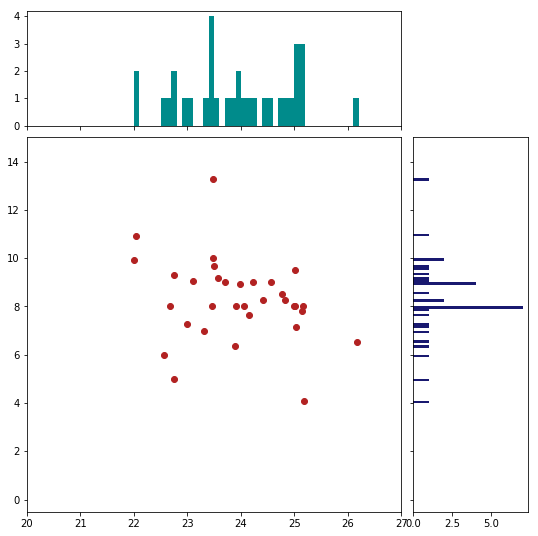

In [110]:
from matplotlib.ticker import NullFormatter

x = np.array(site_lat_list)
y = np.array(uvi_str_to_float)

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(x, y,color='firebrick')

# now determine nice limits by hand:
binwidth = 0.1

axScatter.set_xlim(20, 27)
axScatter.set_ylim(-0.5, 15)

xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins, color='DarkCyan')
axHisty.hist(y, bins=bins, orientation='horizontal', color='MidnightBlue')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

###  <font color=#FF7F50 > 各地緯度與北緯23.5之差距絕對值 與 UVI 對應之散佈圖與直方圖 </font>
欲得知是否與北回歸線距離越近，紫外線越強，因此做了此圖。
由圖主觀推斷 各地UVI強弱 似乎和 觀測站與北回歸線之間距離差距 的相關性不強，並發現多數觀測站設立在北回歸線正負1.5緯度之內。

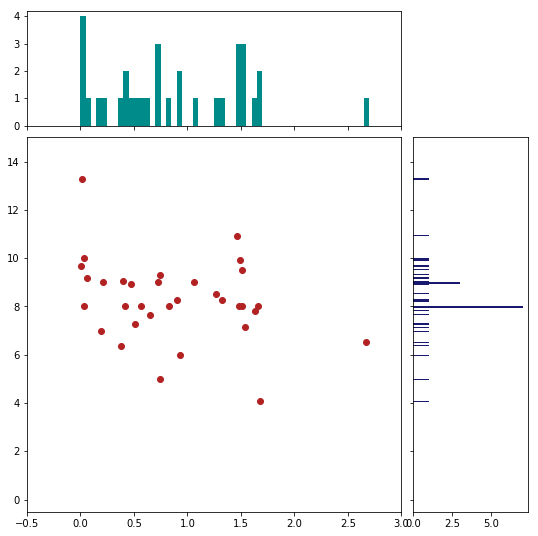

In [111]:
from matplotlib.ticker import NullFormatter

x = np.array(site_lat_list_abs)
y = np.array(uvi_str_to_float)

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(x, y,color='firebrick')

# now determine nice limits by hand:
binwidth = 0.05

axScatter.set_xlim(-0.5, 3)
axScatter.set_ylim(-0.5, 15)

xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins, color='DarkCyan')
axHisty.hist(y, bins=bins, orientation='horizontal', color='MidnightBlue')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

###  <font color=#FF7F50 > 各地緯度與 UVI 對應之相關係數 </font>
引入同一天不同發布時間的資料，查看是否隨著著日照時間的加長，紫外線指數有強弱變化，並探討與緯度的關係。<br>
由下表發現緯度越高的地方，隨著日照時間的加長，與紫外線指數大小呈現負相關，同時也意味著緯度越低的地區，隨著日照時間從早上九點到下午三點，UVI指數有逐漸變大的趨勢，並且由Cohen, J. (1988) 在 Statistical power analysis for the behavioral sciences 對相關係數的解釋，0.5到1之間代表相關性強。而下午三點對應緯度的相關係數的絕對值為0.56，屬於相關性強的範圍之內，代表此時在台灣緯度越高的低區，其所對應的紫外線指數越低。

In [112]:
df = pd.DataFrame()
df['Latitude'] = np.array(site_lat_list)
df['UVI (09:00)'] = np.array(uvi_str_to_float_9)
df['UVI (11:00)'] = np.array(uvi_str_to_float)
df['UVI (13:00)'] = np.array(uvi_str_to_float_13)
df['UVI (15:00)'] = np.array(uvi_str_to_float_15)

df.corr()

,Latitude,UVI (09:00),UVI (11:00),UVI (13:00),UVI (15:00)
Latitude,1.000000,-0.147662,-0.269399,-0.505585,-0.561627
UVI (09:00),-0.147662,1.000000,0.684563,0.276780,0.136628
UVI (11:00),-0.269399,0.684563,1.000000,0.503659,0.231415
UVI (13:00),-0.505585,0.276780,0.503659,1.000000,0.732661
UVI (15:00),-0.561627,0.136628,0.231415,0.732661,1.000000


###  <font color=#FF7F50 > 各地緯度與北緯23.5之距離差距絕對值 與 UVI 對應之相關係數表 </font>
引入同一天不同發布時間的資料，查看是否隨著著日照時間的加長，紫外線指數的強弱變化，並探討與北迴歸線距離差的關係。
由下表發現緯度越高的地方，隨著日照時間的加長，與紫外線指數大小呈現負相關，但多在-0.1 ~ -0.3 之間，是為弱相關，因此北迴歸線雖為夏至時太陽直射地區，但似乎與紫外線強度關聯性低落。

In [113]:
# Absolute distance from site to Tropic of Cancer
df = pd.DataFrame()
df['Abs distance'] = np.array(site_lat_list_abs)
df['UVI (09:00)'] = np.array(uvi_str_to_float_9)
df['UVI (11:00)'] = np.array(uvi_str_to_float)
df['UVI (13:00)'] = np.array(uvi_str_to_float_13)
df['UVI (15:00)'] = np.array(uvi_str_to_float_15)
df.corr()

,Abs distance,UVI (09:00),UVI (11:00),UVI (13:00),UVI (15:00)
Abs distance,1.000000,-0.114034,-0.303038,-0.279447,-0.327799
UVI (09:00),-0.114034,1.000000,0.684563,0.276780,0.136628
UVI (11:00),-0.303038,0.684563,1.000000,0.503659,0.231415
UVI (13:00),-0.279447,0.276780,0.503659,1.000000,0.732661
UVI (15:00),-0.327799,0.136628,0.231415,0.732661,1.000000


## 結論
* * *
- 由以上分析可知UVI與緯度呈現強相關，緯度越低的地區，例如台灣南部，隨著日照時間的增加，紫外線指數也有變大的趨勢，如果在南部低區外出的民眾，需特別注意防曬，因為同時間的較高緯度低區，例如台灣北部，的紫外線指數相對較南部低，所以可驗證在一開始緒論中提到本分析員之朋友所言：「去南部不抹防曬會變很黑」此語句雖是經驗之談，但也是有憑有據，透過資料分析驗證生活中的小發現，也藉此學習許多python模組的運用、爬蟲技巧、資訊視覺化等能力。
- 分析若引入海拔高度資訊擴充後，或許可進一步推論緯度高低、海拔高低與紫外線指數的關係